## Exploring relationships
#### PMF of age
Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

In [14]:
import pandas as pd
brfss = pd.read_hdf("brfss.hdf5")
brfss

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0
...,...,...,...,...,...,...,...,...,...
376876,1.0,173.0,97.52,8.0,12018.935300,3.0,5.57,170.0,32.0
201499,1.0,170.0,68.04,5.0,1939.162770,13.0,2.71,160.0,89.5
192176,1.0,183.0,117.93,4.0,762.342004,8.0,0.53,180.0,57.0
342705,1.0,175.0,61.23,5.0,1417.690180,2.0,4.29,170.0,27.0


     AGE       PMF
0   21.0  0.127194
1   32.0  0.094348
2   52.0  0.087576
3   57.0  0.083001
4   62.0  0.082819
5   27.0  0.082151
6   37.0  0.081655
7   42.0  0.081371
8   47.0  0.073729
9   67.0  0.066634
10  72.0  0.054305
11  89.5  0.044193
12  77.0  0.041025


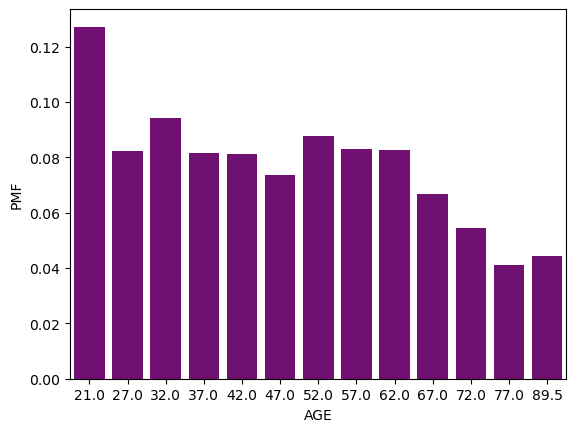

In [32]:
### KENDİ ÇALIŞMAM ###

import seaborn as sns
import matplotlib.pyplot as plt

pmf_age = brfss["AGE"].value_counts(normalize = True).reset_index()
pmf_age.rename(columns = {"proportion": "PMF"}, inplace = True)
print(pmf_age)

sns.barplot(x = "AGE", y = "PMF", data = pmf_age, color = "purple")
plt.show()

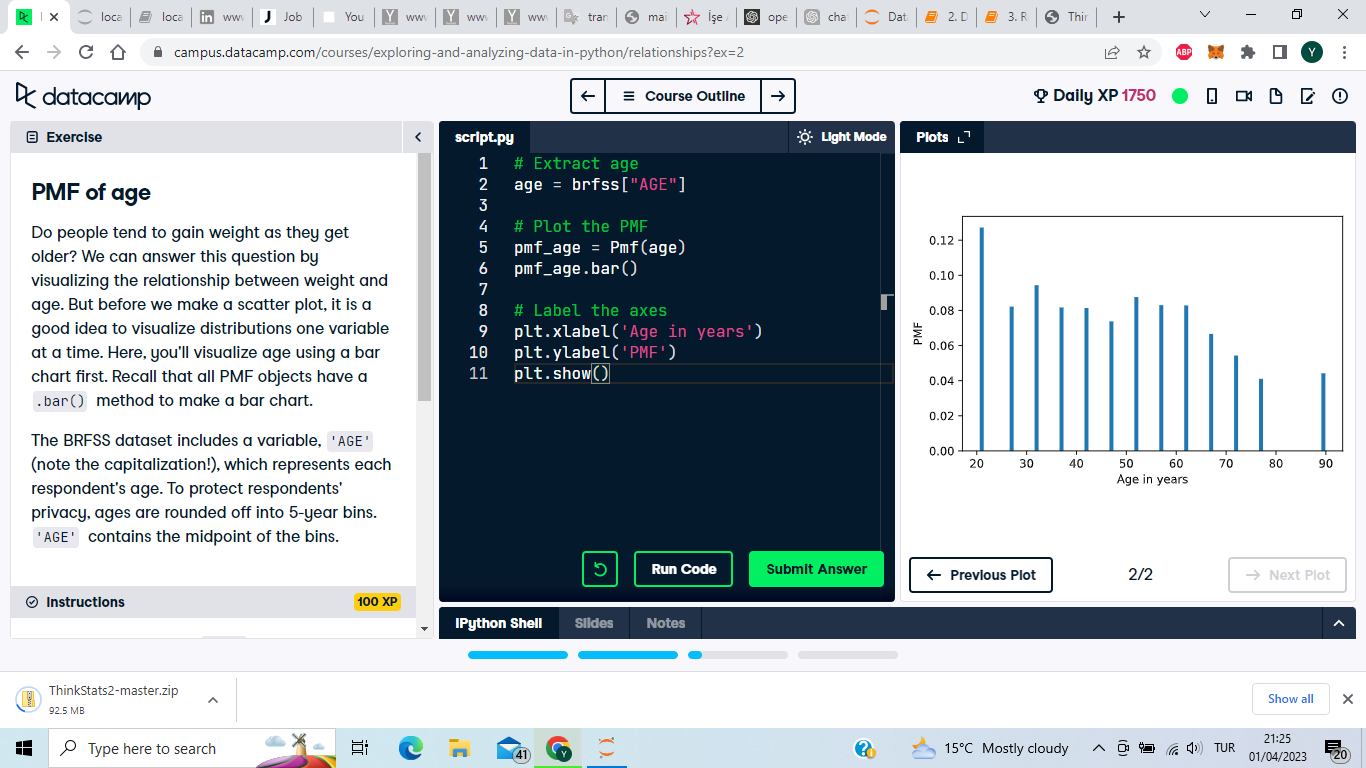

Ok, we're off to a good start. Notice that the last age range is bigger than the others. That's the kind of thing you see when you plot distributions.

#### Scatter plot
Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

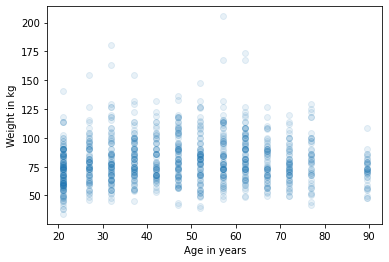

In [2]:
import matplotlib.pyplot as plt

# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight, 'o',alpha = 0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

So far so good. By adjusting alpha we can avoid saturating the plot. Next we'll jitter the data to break up the columns.

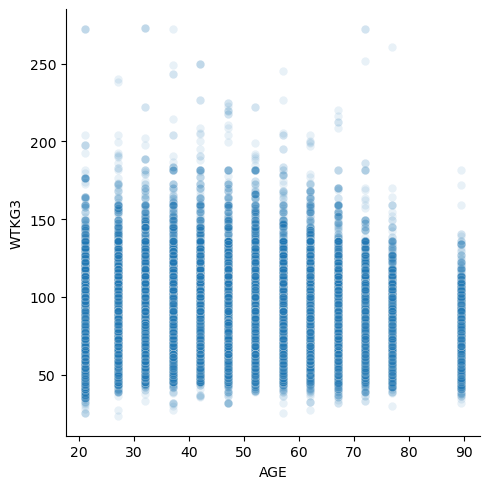

In [36]:
sns.relplot(data = brfss, x = "AGE", y = "WTKG3", kind = "scatter", alpha = 0.1)
plt.show()

#### Jittering
In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:<br>
<br>
height_jitter = height + np.random.normal(0, 2, size=len(brfss))<br>
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))<br>

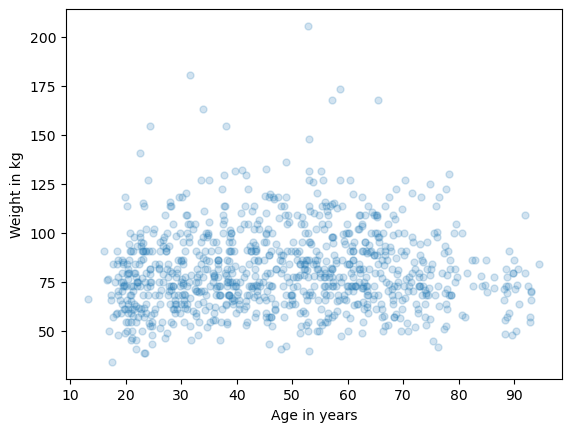

In [48]:
import numpy as np

# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] +  np.random.normal(0, 2.5, size=len(brfss)) #Jittering is a technique used in scatter plots to add random noise 
#to the data points, preventing them from overlapping directly on top of each other. 
#The np.random.normal(0, 2.5, size=len(brfss)) generates random numbers from a normal distribution 
#with mean 0 and standard deviation 2.5. These random numbers are added to each age value in the AGE column of the brfss DataFrame.

# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize = 5, alpha = 0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

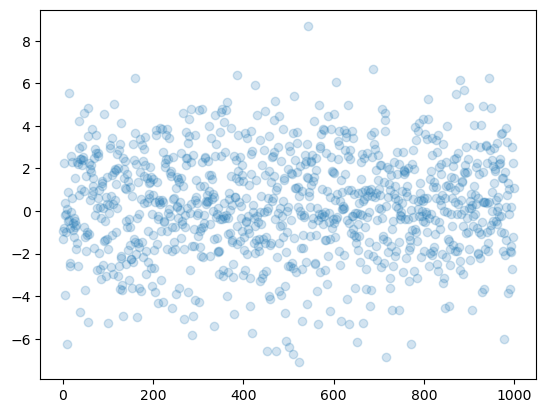

In [49]:
### SADECE NORMAL DISTRIBUTIONIN DAĞILIMINI GÖRMEK İÇİN BUNU ÇİZDİRDİM ###

rand = np.random.normal(0, 2.5, size=len(brfss))
plt.scatter(range(len(rand)), rand, alpha = 0.2)
plt.show()

Excellent. By smoothing out the ages and avoiding saturation, we get the best view of the data. But in this case the nature of the relationship is still hard to see. In the next lesson, we'll see some other ways to visualize it.

## Visualizing relationships
#### Height and weight
Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')

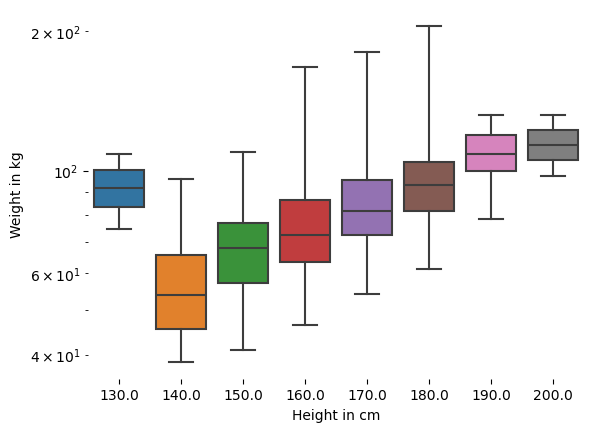

,min,max,mean
_HTMG10,,,
130.0,74.84,108.86,91.850000
140.0,38.56,95.71,57.330000
150.0,40.82,109.77,68.840865
160.0,46.27,167.83,76.642211
170.0,53.98,180.53,85.528247
180.0,61.23,205.48,96.606043
190.0,78.47,131.54,108.140909
200.0,97.52,131.54,114.153333


In [74]:
import seaborn as sns
import numpy as np

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x = '_HTMG10', y = 'WTKG3', data = data, whis = 10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

brfss.groupby("_HTMG10")["WTKG3"].agg(["min","max","mean"])

Very good. These box plots provide a good view of the relationship between the variables. They also show the spread of the values in each column.

#### Distribution of income
In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

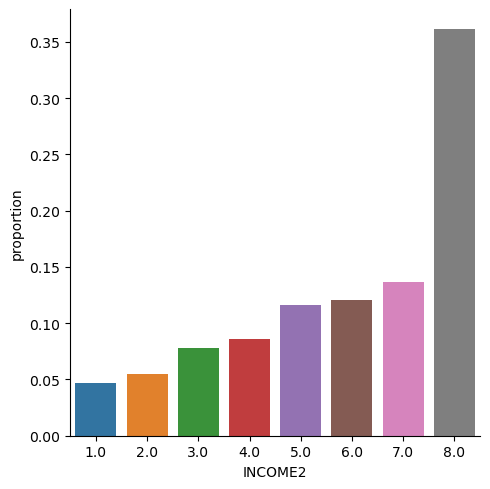

In [79]:
import seaborn as sns

pmf_income2 = brfss["INCOME2"].value_counts(normalize = True).reset_index() ##reset_index diyince otomatik "proportion" sütunu ekliyor"

sns.catplot(data = pmf_income2, x = "INCOME2", y = "proportion", kind = "bar")
plt.show()

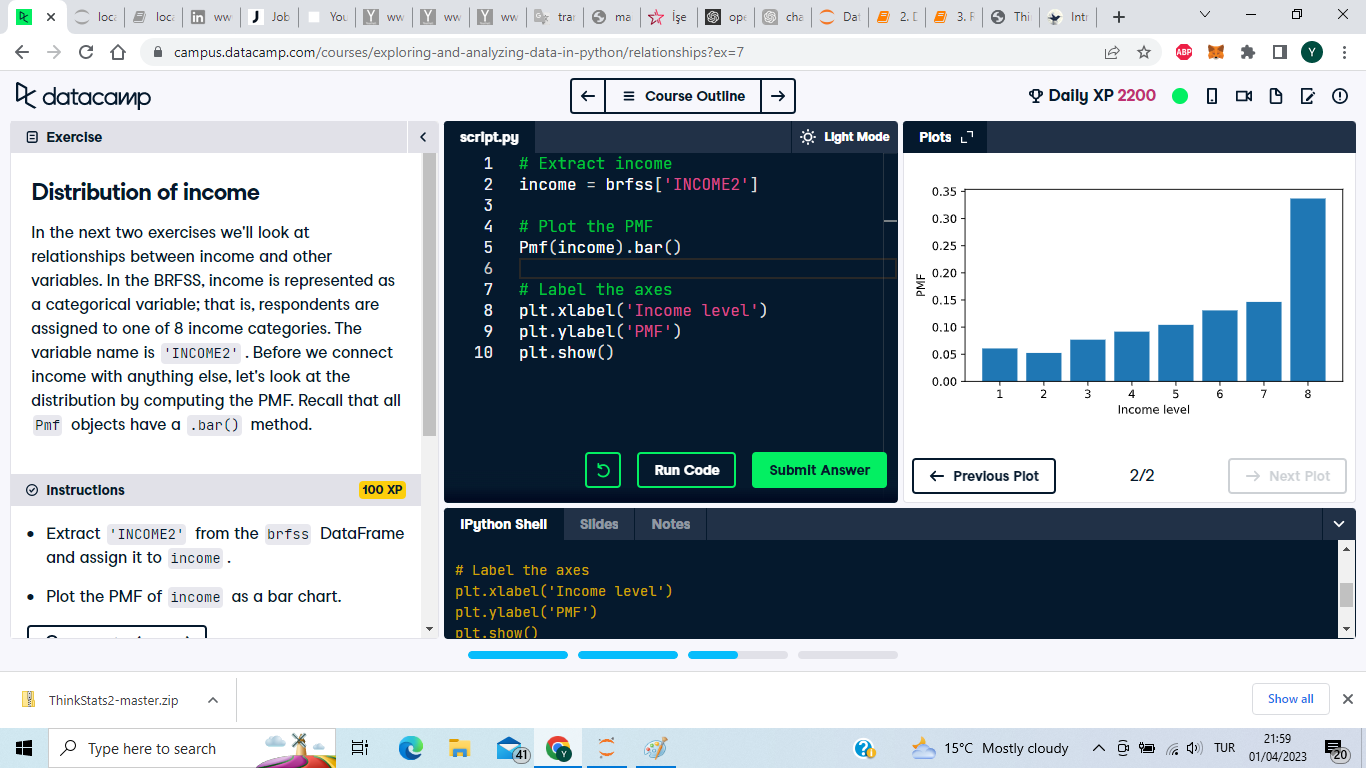

Good work. Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.

#### Income and height
Let's now use a violin plot to visualize the relationship between income and height.

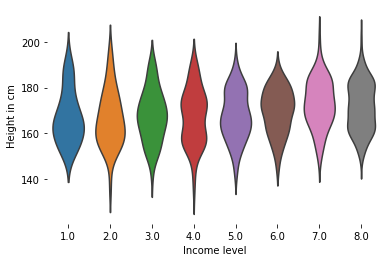

In [5]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y = 'HTM4', data = data, inner = None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


Interesting. It looks like there is a weak positive relationsip between income and height, at least for incomes below the median. In the next lesson we'll see some ways to quantify the strength of this relationship.

#### Computing correlations
The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

In [6]:
# Select columns
columns = ['AGE','INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


So far, so good. In the next exercise you'll think about how to interpret these results.

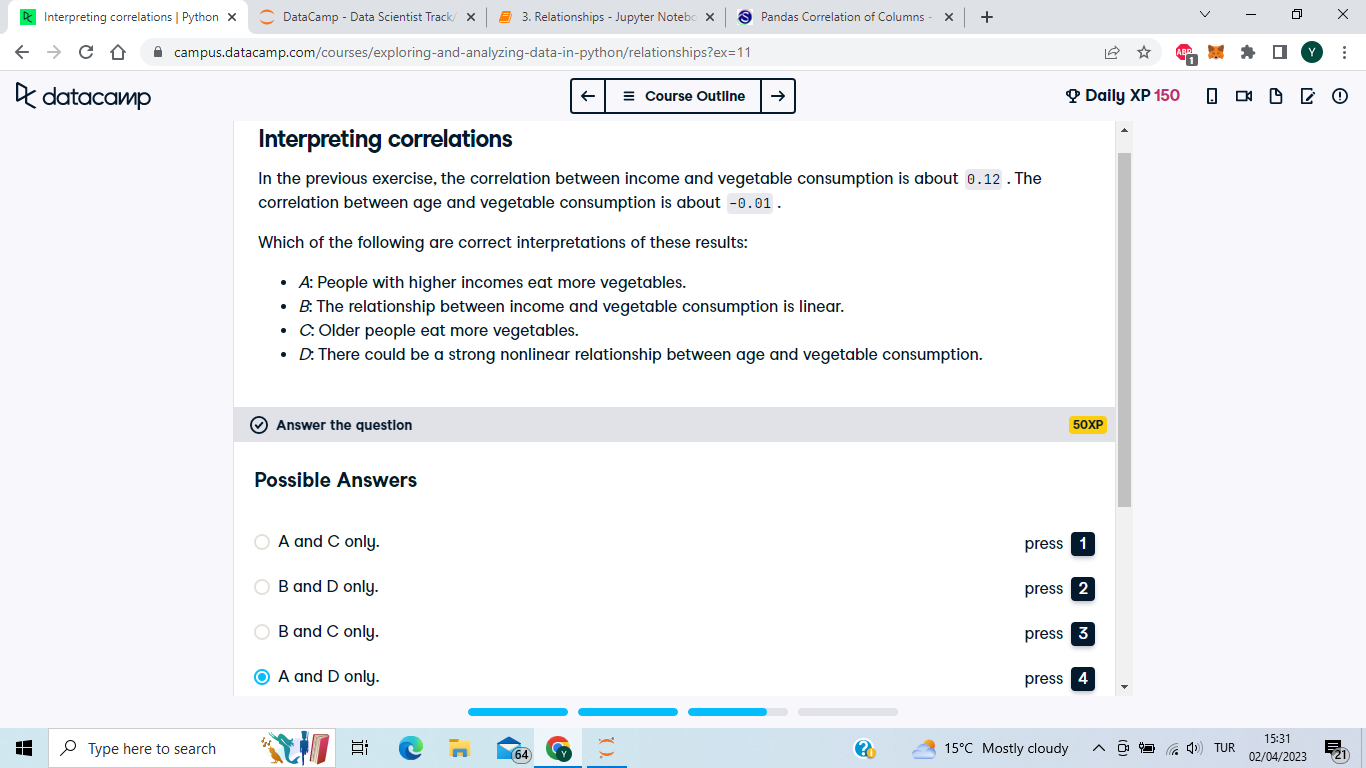

Correct! The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. But a correlation close to 0 does mean there is no relationship.

## Simple regression
#### Income and vegetables
As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [7]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


Good job. The estimated slope tells you the increase in vegetable servings from one income group to the next.

#### Fit a line
Continuing from the previous exercise:

Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit. NumPy has been imported for you as np.

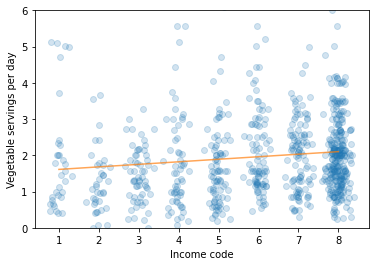

In [8]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

Congratulations on completing Chapter 3! We've seen several ways to visualize relationships between variables and quantify their strength. In the next chapter we use regression to explore relationships among more than two variables.